In [24]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import scipy as scp
from scipy.integrate import trapezoid
import numpy as np
import awkward as ak

In [25]:
#Open root file with both shapes and measurements

FILE_PATH = "../SplittedwaveRootFile/Run_Na_waveform_maggio_1.root" #Relative file path
file = uproot.open(FILE_PATH)
file["tree"].show() #Display contents

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ev                   | int32_t                  | AsDtype('>i4')
nch                  | int32_t                  | AsDtype('>i4')
ch                   | int32_t[]                | AsJagged(AsDtype('>i4'))
base                 | float[]                  | AsJagged(AsDtype('>f4'))
amp                  | float[]                  | AsJagged(AsDtype('>f4'))
charge               | float[]                  | AsJagged(AsDtype('>f4'))
letime               | float[]                  | AsJagged(AsDtype('>f4'))
tetime               | float[]                  | AsJagged(AsDtype('>f4'))
ratecount            | float[]                  | AsJagged(AsDtype('>f4'))
pshape               | float[][1024]            | AsJagged(AsDtype("('>f4', (...


In [26]:
print(type(file["tree"]["base"].array()))
bl=file["tree"]["base"].array()
print(ak.num(bl))
bl = bl[:-1]
print(np.unique(ak.num(bl)))
#l'ultimo array aveva una forma diversa, quindi l'ho tagliato altrimenti faceva casini

<class 'awkward.highlevel.Array'>
[16, 16, 16, 16, 16, 16, 16, 16, 16, ..., 16, 16, 16, 16, 16, 16, 16, 16, 10]
[16]


In [27]:
nch=file["tree"]["ch"].array()[:-1]
print(nch)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ..., [0, 1, ..., 15]]


In [28]:
#Load data to numpy arrays

baselines = np.array(file["tree"]["base"].array()[:-1]) #il [:-1] toglie l'ultimo evento che si è splittato male
charges = np.array(file["tree"]["charge"].array()[:-1])
amp = np.array(file["tree"]["amp"].array()[:-1])
lead_edge = np.array(file["tree"]["letime"].array()[:-1])
t_edge = np.array(file["tree"]["tetime"].array()[:-1])
channel=lead_edge = np.array(file["tree"]["ch"].array()[:-1])
waveform = np.array(file["tree"]["pshape"].array()[:-1])

In [29]:
N_ev=len(charges[:, 0])
print(N_ev)

16972


In [30]:
print(len(waveform[0][0]))

1024


(16972, 16, 1024)
channel: 8 baseline: 0.000419 charge -18.087 lead_edge 8 trailing_edge 1260.935
channel: 2 baseline: 0.000534 charge -0.061 lead_edge 2 trailing_edge 189.14
channel: 12 baseline: -0.003736 charge -8.509 lead_edge 12 trailing_edge 956.096


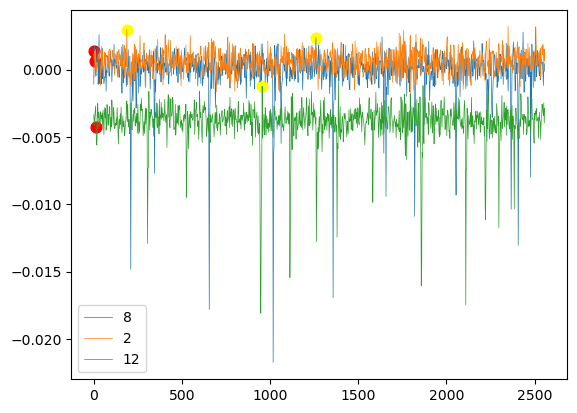

In [31]:
print(waveform.shape)
event= 980
#tra 5 e 13
list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
list=[8,2,12]
sampling=2.5
for channel in list:
    time=np.arange(1024)
    plt.plot(time*sampling, waveform[event][channel], label='{}'.format(channel), linewidth=0.5)
    print("channel:", channel, "baseline:",  baselines[event][channel],"charge", charges[event][channel], "lead_edge", lead_edge[event][channel], "trailing_edge", t_edge[event][channel] )
    t1=lead_edge[event][channel]
    t2=t_edge[event][channel]
    plt.scatter( t1, waveform[event][channel][t1],s=60, color='red'  )
    plt.scatter( t2, waveform[event][channel][int(t2/sampling)],s=60, color='yellow'  )

plt.legend()

In [60]:
#liste con le coppie
firstch = [4, 5, 9, 12, 14]
secondch = [1, 13, 2, 3, 15]

firstch_limits=[]
secondch_limits=[]

paired_amp_1 = []
paired_charge_1 = []
paired_letime_1 = []
paired_wf_1 = []

paired_amp_2 = []
paired_charge_2 = []
paired_letime_2 = []
paired_wf_2 = []

for event in range(N_ev):
    for channel in firstch:
        #controllo se c'è un evento nel primo della coppia
        if(charges[event][channel] < -50):
            #se sì, vedo se ce n'è uno anche nel secondo della coppia
            if (charges[event][secondch[firstch.index(channel)]] < -50):
                #salvo i parametri del primo canale della coppia
                paired_amp_1.append(amp[event][channel])
                paired_charge_1.append(charges[event][channel])
                paired_letime_1.append(lead_edge[event][channel])
                paired_wf_1.append(waveform[event][channel])

                #salvo i parametri del secondo canale della coppia
                paired_amp_2.append(amp[event][secondch[firstch.index(channel)]])
                paired_charge_2.append(charges[event][secondch[firstch.index(channel)]])
                paired_letime_2.append(lead_edge[event][secondch[firstch.index(channel)]])
                paired_wf_2.append(waveform[event][secondch[firstch.index(channel)]])



        


-19696.992


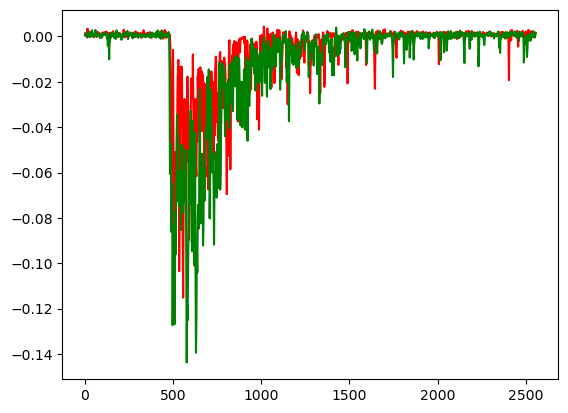

In [73]:
print(paired_charge_1[2])

plt.plot(time*sampling, paired_wf_1[10], color = 'red')
plt.plot(time*sampling, paired_wf_2[10], color = 'green')

-873.52
-356.972
0.002898
0.003508


(array([1.6965e+04, 2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.001677  , 0.0184902 , 0.0353034 , 0.0521166 , 0.0689298 ,
        0.085743  , 0.1025562 , 0.1193694 , 0.13618261, 0.1529958 ,
        0.169809  ]),
 <BarContainer object of 10 artists>)

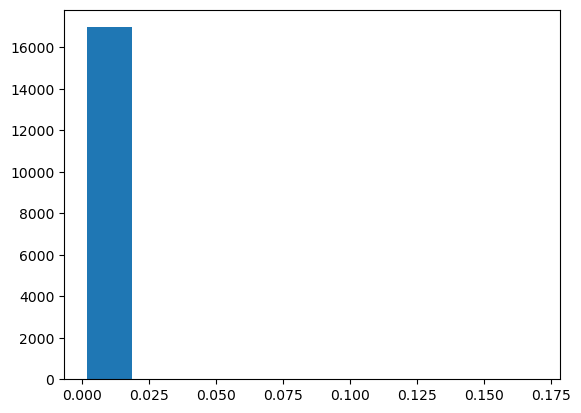

In [57]:
print(charges[981][5])
print(charges[981][13])

print(amp[981][5])
print(amp[981][13])
#plt.yscale('log')